In [1]:
import lib.database as db
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

/mnt/chromeos/MyFiles/master/tesis/lib/database.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frec_df.index,rotation=90)


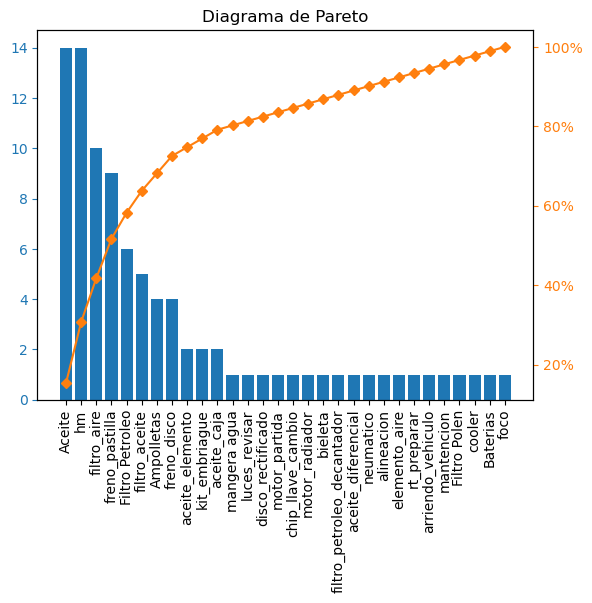

In [2]:
db.pareto()

In [3]:
    prd_tp = pd.read_csv('data/prod_tp.csv', index_col=0)
    prd_tp_df= pd.DataFrame(prd_tp)

    vnt = pd.read_csv('data/vnt_tmp_.csv', index_col=0)
    vnt_df= pd.DataFrame(vnt)

    pareto_df=pd.merge(vnt_df,prd_tp_df,left_on='prd_tp',right_on='1')
    #pareto_df=pareto_df['n']
    
    #pareto_df.groupby(['Accesorios']).sum()
    
    #frec= pd.value_counts(pareto_df['Accesorios'])
    #frec_df= pd.DataFrame(frec)

    #frec_df.columns = ["Frec_abs"]
    #frec_df["Frec_rel_%"]=100*frec_df["Frec_abs"]/len(pareto_df)

    #Frec_rel_val= frec_df["Frec_rel_%"].values
    #acum=[]
    #valor_acum= 0
    #for i in Frec_rel_val:
    #    valor_acum = valor_acum + i
    #    acum.append(valor_acum)
    
    #frec_df["Frec_rel_%_acum"]= acum

In [4]:
o= pareto_df[['Accesorios','q','total']]
frec= o.groupby(['Accesorios']).sum()
frec_df=pd.DataFrame(frec)
frec_df=frec_df.sort_values(by='total', ascending=False)
frec_df.head()

,q,total
Accesorios,,
kit_embriague,2,2635000
arriendo_vehiculo,24,1680000
hm,14,1583100
Aceite,21,840000
freno_disco,4,475000


In [5]:
frec_df["Frec_abs"]= frec_df['total']
frec_df["Frec_rel_%"]=100*frec_df["Frec_abs"]/frec_df['total'].sum()
Frec_rel_val= frec_df["Frec_rel_%"].values
acum=[]
valor_acum= 0
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)

frec_df["Frec_rel_%_acum"]= acum

#def notas(nota):
#    nota = int(nota.TheValue)
#    if nota < 80:
#        return 'Suspenso'
#    elif nota < 90:
#        return 'Aprobado'
#    else:
#        return 'Sobresaliente'
#frec_df['Result'] = frec_df.apply(notas, axis=1)



/tmp/ipykernel_554/308853275.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(frec_df['Frec_rel_%_acum'].round(0),rotation=90)


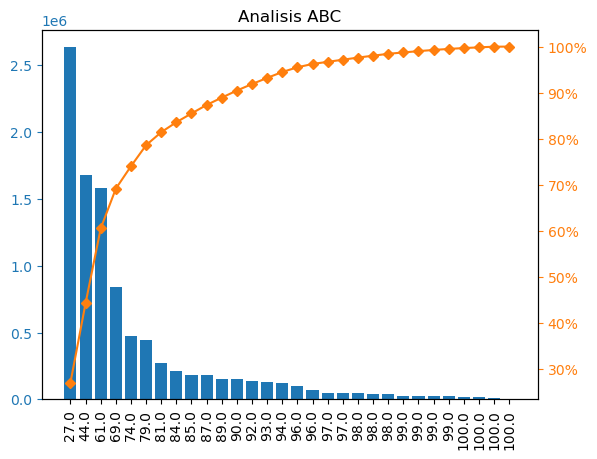

In [6]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.set_title('Analisis ABC')
ax.bar(frec_df.index, frec_df["Frec_abs"], color="C0")

ax2= ax.twinx()
ax2.plot(frec_df.index,frec_df["Frec_rel_%_acum"],color="C1", marker= "D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")


ax.set_xticklabels(frec_df['Frec_rel_%_acum'].round(0),rotation=90)

plt.show()

# Propuesta de mejora de proceso de gestión de inventario, mediante la implementación de WMS para el caso de área de almacén del taller de servicio mecánico integral y electricidad automotriz DUARCON

# Trabajo de titulación presentado en conformidad a los requisitos para obtener el Titulo de Ingueniero Civil Industrial TESIS PARA TITULO PARA LA OBTENCIÓN DEL TITULO INGENIERO CIVIL INDUSTRIAL"
# Felipe Kiefer Guenupan

# Introducción

## Antecedentes, situación actual mercado automóvil

  El inicio de la pandemia del COVID-19 a afectado la venta de automóvil, el primer semestre del año 2020 hubo una reducción en la compra de vehículos livianos y medianos. la figura \@ref(fig:vauto) presenta las ventas del mercado automotor de livianos y medianos, realizado por Asociación Nacional Automotriz de Chile (ANAC).

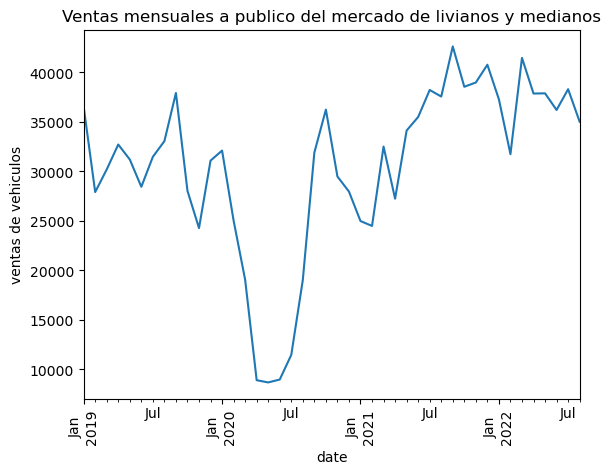

In [2]:
db.anac_df()

En primera instancia en el gráfico se puede observar un valle debido a "principalmente, por el deterioro de las condiciones económicas a nivel internacional que han afectado a distintos mercados, no solo el automotriz, las cuales se han visto acrecentadas por las circunstancias políticas y económicas a nivel local"[^22], posterior debido al desconfinamiento progresivo a nivel nacional de ciertas comunas por la implementación del programa Paso a Paso, Adicionalmente, el factor del retiro del 10% de las AFP ha demostrado un nivel de incidencia certero en la adquisición de bienes durables como los automóviles, lo que se sumaría a la recuperación del sector [^23]. Meses posteriores este mercado automotriz a visto una disminucion en la variacion de ventas conrespecto al año movil. En consecuencia se espera un aumento en la demanda de los servicios de mantenimiento y reparación automotriz.

## Descripción general de la organizicion

  `r nam` es una pequeña empresa[^7] dedicada la reparación mecánica y eléctrica automotriz de vehículos livianos[^1], ubicada en `r dire`, cuenta con una plantilla de `r trb.ttl` trabajadores (`r adm` administrador y `r mec.ttl` mecánicos, detallado en la figura \@ref(fig:estruc)). Creada en el ano `r yearsince`, ha entregado sus servicios a la comunidad cercana, su demanda constante del servicio impulso expandir la plaza de servicio, desde `r area.tll.old` ft^2^ a `r area` ft^2^. Debido a la demanda del servicio el año `r yearwh`, `r nam` a incorpora a su taller un almacén con un área de `r area.viejo`, con el propósito de alojar repuestos necesarios en el servicio de reparación, en el segundo semestre del presente ano `r nam`, con el fin agregar a su linea de negocio la venta de neumáticos se construye otro almacén con un área de `r area.nuevo` ft^2^, lo que da un total de `r area.total.almacen` ft^2^ de plaza para almacén (vease \@ref(fig:layout)).

### Descripción de la organización: historia, productos y mercados principales, estructura organizacional, tamaño, etc. (¿Quién soy?)

Iniciada en `r yearsince` entregaba el servicio de reparación electrica complementario a un taller a vecino posterior incursiono en servicio de mantencion para finalmente entregar servicio de mecanico integral a perdurado en rubro de la reparación automotriz brindado a la comuna de Quilicura el servicio de reparación electica 

<img src="marco teorico/organigrama.png" alt="drawing" width="200" display= "center"/>
<img src="marco teorico/image/ubicacion.png" alt="drawing" width="200"/>
![image](marco teorico/organigrama.png)

![image](marco teorico/organigrama.png)

FODA

Fortalezas
entrega de nuevos servicios
dispocicion en inversion al taller
espacio de almacenamiento
abundante stock

Oportunidades
definir procesos
amento demantda vehicular
mitegacion de espacion necesairo para inventario

Debilidades
estandarizar prestación
conocimiento poco exacto

Amenazas
competencia 
perdida de stock

### Descripción del medio en el cual se encuentra la organización: características de la industria, de la economía, etc. (¿Dónde estoy?)

FODA

Fortalezas
entrega de nuevos servicios
dispocicion en inversion al taller
espacio de almacenamiento
abundante stock

Oportunidades
definir procesos
amento demantda vehicular
mitegacion de espacion necesairo para inventario

Debilidades
estandarizar prestación
conocimiento poco exacto

Amenazas
competencia 
perdida de stock

### Servicios que brinda
## Antecedentes, situación actual mercado automóvil

La empresa brinda servicios automotrices tanto en el aspecto mecánico, electrónico y de latonería. A continuación se desglosan todos los servicios que se ofrecen.

Aspecto mecánico automotriz liviano-mediano.

* ABC de Motor.
* VABC de Frenos.
* Suspensión.

Embrague.
Reparación de motores.
Mantenimiento Predictivo/Preventivo/Correctivo.
Cambios de aceite al instante.
Cambios de Filtros de aire.
Cambios de Filtros de polen.
Reparación de cajas automáticas con garantía.
Reparación del sistema eléctrico del vehículo.
Controles de calidad.
Limpieza de inyectores.
Limpieza por ultrasonido.
Laboratorio de comprobación de inyectores.
Filtros y o’rings de inyector (Comercialización).

yiagnóstico computarizado.
Diagnóstico para toda marca de vehículos.
Escáneres actualizados al 2010 (SPC, OTC).
Frenos ABS.
Sistema de Airbag.
OBD II.

### Descripción de la estrategia, para saber cuál es la dirección en que camina la empresa. (¿Qué quiero?)



### Descripción del ámbito de trabajo: propósito, personas, procesos, estructura, tecnología, etc.

El lugar de trabajo esta clasificado en área de servicio, area de almacen, area compresor, servicio higene, casino.

  ```{r echo=FALSE, fig.pos='H' ,fig.cap='layout taller', fig.id='layout',fig.align='center',out.width = '50%'}
    knitr::include_graphics("marco teorico/plan.png")
  ```


### Descripción del entorno inmediato y relaciones: ubicación del ámbito de trabajo: relaciones con otras áreas, qué y a quiénes provee, de quiénes recibe qué, etc.

`r nam`  proveedores


```{r echo=FALSE, fig.pos='H',fig.cap='Macroproceso Gestión, Producción y Provisión Bien o Servicio', fig.id='estruc', fig.align='center',out.width = '50%'}
  knitr::include_graphics("marco teorico/image/Macro.png")
```

### Descripción cuantitativa de las situaciones en que se trabajará:
identificación, descripción breve, estimación de costos, nivel de urgencia por cambiar, ¿qué riesgos tiene mantener la situación actual?, etc.

  `r nam` es una pequeña empresa[^7] dedicada la reparación mecánica y eléctrica automotriz de vehículos livianos[^1], ubicada en `r dire`, cuenta con una plantilla de `r trb.ttl` trabajadores (`r adm` administrador y `r mec.ttl` mecánicos, detallado en la figura \@ref(fig:estruc)). Creada en el ano `r yearsince`, ha entregado sus servicios a la comunidad cercana, su demanda constante del servicio impulso expandir la plaza de servicio, desde `r area.tll.old` ft^2^ a `r area` ft^2^. Debido a la demanda del servicio el año `r yearwh`, `r nam` a incorpora a su taller un almacén con un área de `r area.viejo`, con el propósito de alojar repuestos necesarios en el servicio de reparación, en el segundo semestre del presente ano `r nam`, con el fin agregar a su linea de negocio la venta de neumáticos se construye otro almacén con un área de `r area.nuevo` ft^2^, lo que da un total de `r area.total.almacen` ft^2^ de plaza para almacén (vease \@ref(fig:layout)).

  **Label aparte con simbologia**

  ```{r echo=FALSE, fig.pos='H' ,fig.cap='layout taller', fig.id='layout',fig.align='center',out.width = '50%'}
    knitr::include_graphics("marco teorico/plan.png")
  ```
  ```{r echo=FALSE,fig.pos='H'}
  area.tbl
  ```

  Para realizar el servicio de reparación automotriz, el mecánico dispone de repuestos los cuales son solicitados a almacén, el administrador se encarga en la preparación del repuesto según los siguiente requisitos.

  * Tipo repuesto
  * Modelo de vehículo
  * Cantidad requerida

  Lo siguiente es ubicar en el los distintos rack el repuesto requerido y realizar picking[^2], para posterior entregar al mecánico y así continuar con la reparación del vehículo. tal como detalla la figura \@ref(fig:bpmnout).

  El proceso mencionado anteriormente **carese de integridad en la información**[^3] por el procedimiento con el que se realiza la ubicación del repuesto, debido a que no existe registro de su ubicación, esto tiene relación con el procedimiento al almacenar recepción, el cual se agrupa según marca de vehículo y se rotular el packing el producto por modelo, tal como detalla la figura \@ref(fig:bpmnin).

```{r echo=FALSE,fig.pos='H'}
plot(pare)
```

# Capitulo I: Definición del Problema
## Problema y Preguntas de Investigación

  El tema abordado en esta memoria nace de un problema presentado de forma directa por `r nam` que es el desconocimiento del stock, desde esta base se ha podido hallar otro problema del proceso de gestión de inventario, como el mencionado anteriormente que es la ubicación del stock en recepción. Analizaremos el inventario existente, clasificado según el tipo de repuesto con un costo de $`r cst.stock` pesos, la variedad de producto es de `r lng.ttl.prod` y una cantidad total de stock de `r sm.total.in`. Para resumir el stock existente la figura \@ref(fig:inventario) se presenta la distribución de frecuencia de cantidad agrupado según su clasificación

  ```{r echo=FALSE,fig.cap="Histograma, resumen de existencias",out.width = '100%',  fig.id="inventario",fig.align='center'}
    plt.rsmn.prd
  ```

  Se puede observar la existencia de sobre stock ejemplo de ello es la categoría `r "**categoria**"` el cual presta un producto con un stock superior a `r "**stock max 60**"` unidades

## Justificación de la Investigación. - Breve Resumen Capitular.

  **Pendiente cuantificar costoss **

## porque es importante este proyecto
  Para entender la importancia del inventario, y por que de enfocarse en ello, se señala que "el inventario es uno de los activos más costosos de muchas compañías, llega a representar hasta un 50% del capital total invertido.[...] Por un lado, una empresa puede reducir sus costos al disminuir el inventario" [@heizer, pp. 484], ademas "la sola permanencia de este inventario está generando un sin número de costos asociados" [@salas2009inventarios, pp. XVI].

## cual es la problemática que intenta solucionar

  Obtenidos los datos y como se generan, se puede señalar que la problemática es de tipo metodológico (que implican un método o proceso estricto para ser solucionados), e involucra al proceso completo desde la entrada hasta la salida de stock, evidenciando la falta de control del inventario.

  "Las buenas políticas de inventarios pierden sentido si la administración no sabe qué hay disponible en su inventario" [@heizer, pp. 486]. En consecuencia este sera la problemática a solucionar. Para la presente proyecto el objetivo es **mejorar** la gestión de inventario actual de Duarcon con respecto a la rapidez de y solides de la información, para ello se propone implementar una herramienta tecnológica en especifico un software, capas de registrar, controlar y entregar métodos, técnicas que otorguen al administrador capacidad de tomar decisiones concretas acerca de pedidos.

## por que este proyecto y no otro

  La realización de este proyecto es importante debido a que "Sólo cuando la organización puede determinar con exactitud qué está disponible es capaz de tomar decisiones concretas acerca de pedidos, programación y embarque", "La exactitud de los registros permite a las organizaciones enfocarse en aquellos artículos que son más necesarios, en vez de tener la seguridad de que “algo de todo” está en inventario" [@heizer, pp. 486], ademas agregar que el proceso de inventario no agrega valor al servicio. Se puede inferir que de haber existido un sistema gestión de inventario, correcto con exactitud en los registros, habría desechado el **costo de oportunidad** de realizar de la ampliación de almacén por utilizar ese espacio en otra estación de reparación.

## Formulación de hipótesis.
### Hipótesis general

  La utilización de un sistema tecnológico de manejo y control en la gestión de inventario herramienta permitirá reducir el espacio necesario de almacenamiento.

### Hipótesis específicas

  * Aplicar 5's facilitara la implementación de nuevas mejoras.
  * Cuantificar, clasificar el inventario y comparar con la demanda visibilizara sobrestock.
  * Cuantificar el costo de inventario incentivara el análisis y una posterior optimización.
  * La implementación de indicadores de gestión permitirá mejora en decisiones rápidas en operaciones del almacén.
  * La implementación de procedimientos generará una comunicación eficaz entre las áreas internas.

  Para la solución del proceso de gestión de inventario, es necesario mejorar la metodología en la gestión del almacén, contemplando distribución, lenguaje iconico [^5], involucrando métodos y herramientas logísticas, ademas alineado en la **industria 4.0** se implementara una herramienta tecnológica que simplifique la utilización de los métodos y herramientas.

## Objetivos de la Investigación.
### Objetivo general:

  Mejora de método, herramientas y técnicas que contribuyan en la gestión y control de inventario del almacén con el fin de proporcionar al operador de almacén información suficiente para una solida toma de decisiones y con ello la optimizacion de inventario.

### Objetivos específicos:

  * Identificar y analizar, la situación actual de la gestión y control del inventario.
  * Evaluar la factibilidad de la propuesta de mejora.
  * Rediseñar el subproceso de entrada y salida.
  * Integrar al rediseño herramienta tecnológica que facilite la ejecución del proceso.
  * Evaluar los resultados contrastando con la situación actual.
## Variables de Estudio[^4].
### Variables Dependientes

  * Servicio almacén

### Variables Independientes Intangible

### Variables Independientes tangibles

### Variables Intervinientes

## Alcance de la investigacion

no se tiene acceso a repuestos despachados 

# Capítulo II: MARCO TEÓRICO

## Marco referente a Logistica

La logística es un proceso relacionado con la administración efectiva del flujo de bienes y servicios. Su operatividad afecta el desenvolvimiento de muchas áreas de la organización; es por ello que se puede mencionar de un sistema logístico que mediante la sincronización de sus componentes, permite lograr el flujo necesario para responder de manera efectiva a una demanda cambiante y cada vez más exigentes.

Etapas de la logística:

1. Logística de entrada: Planificación, gestión de materiales, alianza con los proveedores, negociación, compras y abastecimiento.
2. Logística del proceso: Planificación y manejo de recursos.
3. Logística de salida: Distribución física y servicio al cliente.
4. Supply Chain Management: Gestión de la cadena de valor.
5. Logística inversa: Manejo de devoluciones, atención al cliente.

### Administración de inventario
El objetivo de la administración de inventarios es encontrar un equilibrio entre la inversión en el inventario y el servicio al cliente. Sin un inventario bien administrado nunca se podrá lograr una estrategia de bajo costo [@heizer, pp. 484] lo cual esta ligado principios del lean manufacturing.

El inventario puede dar servicio a varias funciones que agregan flexibilidad a las operaciones de una empresa. Las cuatro funciones del inventario son:

1. "Desunir" o separar varias partes del proceso de producción. Por ejemplo, si los suministros de una empresa fluctúan, quizá sea necesario un inventario adicional para desunir los procesos de producción de los proveedores.
2. Separar a la empresa de las fluctuaciones en la demanda y proporcionar un inventario de bienes que ofrezca variedad a los clientes. Tales inventarios son típicos de los establecimientos minoristas.
3. Tomar ventaja de los descuentos por cantidad, porque las compras en grandes cantidades pueden reducir el costo de los bienes y su entrega.
4. Protegerse contra la inflación y los cambios a la alza en los precios.

#### Sistema ABC de la clasificación de inventarios

El análisis ABC divide el inventario disponible en tres clases con base en su volumen anual en dinero, la figura \@ref(fig:ABC) representa este análisis. El análisis ABC es una aplicación a los inventarios de lo que se conoce como principio de Pareto. El principio de Pareto establece que hay "pocos artículos cruciales y muchos triviales"[^13]. La idea es establecer políticas de inventarios que centren sus recursos en las pocas partes cruciales del inventario y no en las muchas partes triviales. No es realista monitorear los artículos baratos con la misma intensidad que a los artículos costosos [@heizer, pp. 485]. Ademas se afirma que "si se aplican en forma selectiva políticas de inventarios a estos diferentes grupos, pueden lograrse, con niveles más bajos de inventarios, los objetivos del servicio de inventarios, en vez de una política aplicada colectivamente a todos los productos" [@logist, pp. 376].

```{r echo=FALSE,fig.pos='H',fig.align='center', fig.cap='Ejemplo, representación gráfica del análisis ABC', fig.id='ABC', out.width='50%'}
knitr::include_graphics("marco teorico/image/abcteo.png")
```

#### Conteo cíclico o "inventario"

Aunque una organización haya realizado esfuerzos sustanciales para registrar con precisión su inventario, los registros deben verificarse mediante una auditoría continua. El conteo cíclico usa la clasificación del inventario desarrollada en el análisis ABC. Con los procedimientos de conteo cíclico, se cuentan los artículos, se verifican los registros, y se documentan las imprecisiones de manera periódica. Se rastrea la causa de las imprecisiones y se toman las acciones correctivas apropiadas para asegurar la integridad del sistema de inventario. La frecuencia de conteo depende del tipo de producto de mayor a menor los artículos, A,B,C respectivamente [@heizer, pp. 487]

### Warehouse

Un almacén controla el ingreso y salida de materiales, por lo tanto es importante tener codificados todos los productos, definir correctamente las unidades y clasificar los ítems. Según Cachay (2010) es definido “Proceso de la función logística que trata la recepción, almacenamiento y movimiento dentro de un mismo almacén hasta el punto de consumo de cualquier material, así como el tratamiento e información de los datos generados”.

El proceso de planificación, organización y gestión de almacenes está a cargo de la gerencia o jefatura, alcanza las actividades de carácter estratégico y táctico. Estas actividades contempla:

1. Diseño de la red de distribución y almacenamiento

2. Responsabilidades de la gestión de almacenes: 

3. Ubicación de los almacenes: Las decisiones sobre ubicación implican de determinar el número, ubicación y tamaño de las instalaciones que se utilizarán.

4. Diseño y Layout de los almacenes: Corresponde a la disposición de los elementos dentro del almacén.

5. Modelo de organización física de los almacenes:
    + Determinar las ubicaciones de existencias y establecer el sistema de almacenamiento.
    + Establecer el sistema de manejo de materiales.
    + Mantener un sistema de control de inventarios.
    + Establecer procedimientos para tramitar los pedidos.
    + Seleccionar el medio de transporte.

Como primicia, la propuesta de esta investigación es la implementación de un métodos de control en la gestión de inventario mediante un software WMS, por lo que respecta a la construcción del software se analizara de forma general sin caer en demasiado tecnicismos, se incluirá información acerca de su funcionamiento, debido a que es un proyecto para el titulo de la carrera ingeniero civil industrial.

Con respecto a lo anterior se ha consultado proyectos con un objetivo similar de la implementación de un software, pero propuesto por un ingeniero ajeno a la ingeniería informática, con el objetivo de visibilizar la nula limitante de este tipo de propuesta, ademas esperando ser un aporte se agrega que el desarrollo de software es realizado por el autor de este proyecto con los conocimientos adquiridos en la carrera ademas de fruto de investigación estos conocimientos comprenden, estadística, logística, proceso, informática.

La problemática de la organización, la cual radica en el método utilizado para la gestión de inventario se presenta algunos conceptos y teorías que se enfocan en **Rediseño de procesos**, **Administración de inventario**, y desarrollo software en especifico **desarrollo web**, para lo cual se mencionaran estrategias y metodología que posibiliten la solución al del problema del almacén, también se menciona la industria 4.0 debido a que se plantea como un modelo actual que reconoce la evolución de la industria en torno a la tecnología.

Para crear el puente a la construcción de software se utilizara la teoría de Oscar Barros el autor propone en su libro que los procesos típicos de todas las organizaciones son pocos y las prácticas para ejecutar dichos procesos no difieren mucho. Es por esto que se puede modelar una estructura general para cada uno de ellos y luego ser aplicada a un dominio específico.

## Marco referente a rediseño de procesos
El rediseño de procesos consiste en tomar las actividades de un proceso en su totalidad y someterlas a un cambio fundamental, el cual habitualmente implica un uso intensivo de Tecnologías de la Información que garantice un desempeño claramente mejorado del mismo [@proce, pp. 14], ademas concluye que "en cualquier organización hay un numero pequeño de tipos de procesos y cada uno de ellos ademas, de tener una arquitectura o estructura común que comparte con los otros es muy parecido en su esencia en diferentes contextos, a esta estructura común le denomina **Patrón de proceso**" [@proce, pp. 17]. para esto define el concepto de **Macroproceso** "como un conjunto de procesos que podemos ligar naturalmente y  que en algunas situaciones ocurren en forma totalmente interrelacionada" [@proce, pp. 21]. Coincide con este análisis el Trabajo estándar [@leanmanu, pp. 297] que tiene su fundamento en la excelencia operacional, sin el trabajo estandarizado no se puede garantizar que en las operaciones siempre se elaboren los productos de la misma manera. El trabajo estandarizado hace posible aplicar los elementos de Lean Manufacturing (se interiorizara mas adelante) ya que define de la manera mas eficiente los métodos de trabajo para lograr la mejor calidad y los costos mas bajos".

Es así como se definen 4 macroprocesos que se muestran a continuación:

### Definición Macroprocesos
1. Macroproceso 1, de gestión, producción y provisión del bien o servicio: Se define como aquel que “representa la cadena integral del valor de una empresa, parte desde que se genera el requerimiento del cliente, pasando por la obtención de factores ofrecidos por los proveedores, producción del bien o servicio y entrega al cliente final. Referida a las cadenas de abastecimientos (supply chain) de una organización” [@proce, pp. 22]

2. Macroproceso 2, desarrollo de nuevos productos y/o servicios: “contiene el conjunto de actividades, que muchas veces se encuentran dispersas en diferentes áreas funcionales, que permiten descubrir, definir, evaluar, diseñar, probar e implementar nuevos bienes o servicios en una compañía” [@proce, pp. 23]. Su propósito es innovar incrementando la oferta a los clientes y generar ventajas competitivas.

3. Macroproceso 3 Planificación de negocio: “Son todas aquellas actividades a nivel táctico y estratégico que buscan establecer políticas, planes, programas u orientaciones buscando guiar el destino de la empresa a futuro (mediano o largo plazo)” [@proce, pp. 25]. Estas actividades son: Definición del negocio, Estructura del negocio, Planificación mediano-largo plazo.

4. Macroproceso 4 de apoyo: Ciclo de vida de un recurso
Contiene el conjunto de actividades que tienen como propósito ejecutar el ciclo de vida de los recursos y su funcionamiento. Consiste en detectar necesidades, obtener, asignar y designar recursos humanos, financieros, de materiales, insumos, infraestructura, entre otros [@proce, pp. 29].

### Modelamiento de procesos
La interacción entre los macroprocesos se da a través de flujos que representan como
un macroproceso se alimenta y requiere servicios de los otros macroprocesos. Para el
modelamiento de procesos se propone la utilizacion de los diagramas de flujos y patrones conocida como IDEFO (Integration Definition for Function Modeling) [@proce, pp. 34] la figura \@ref.

```{r echo=FALSE,fig.cap='Metodología rediseño', fig.id='metoredi', out.width = '80%',fig.align='center', fig.pos='H'}
knitr::include_graphics("marco teorico/image/modelamientoestructurado.png")
```

### Metodología de rediseño mediante el uso de patrones

Barros propone dos metodologías para realizar reingeniería o rediseño de procesos, resumidas indican que:

1. Propuesta originalmente por **Hammer**, enfatiza en la "idea empezar de cero" lo cual implica repensar sin prejuicio histórico, el proceso en cuestión.

2. Propone partir de un conocimiento profundo del proceso actualmente existente, a partir de esto generar una propuesta de rediseño.

de lo anterior adapta la metodología propuestas en el libro Reingeniería de Procesas de Negocios [@proce, pp. 97], que se presenta resumido en la figura \@ref(fig:metoredi)

```{r echo=FALSE,fig.cap='Metodología rediseño', fig.id='metoredi', out.width = '80%',fig.align='center', fig.pos='H'}
knitr::include_graphics("marco teorico/diagramas/metologia_rediseno.png")
```

## Marco referente a métodos, filosofias, herramientas.

Esta sección del marco se basa en la teoría del libro "Lean Manufacturing paso a paso" del autor Luis Socconini el cual presenta las diferentes herramientas y técnicas que contribuirán con el objetivo de la propuesta, estas se clasifican de la siguiente manera:

1. Herramientas básicas
    + 5's
    + Andon, Control visual
2. Herramientas para mejorar la calidad
    + AMEF, análisis de modo y efecto de falla
    + Poka Yoke, a prueba de errores

### Industria 4.0

El término industria 4.0 se refiere a un nuevo modelo de organización y de control de la cadena de valor a través del ciclo de vida del producto y a lo largo de los sistemas de fabricación apoyado y hecho posible por las tecnologías de la información. El término industria 4.0 se utiliza de manera generalizada en Europa, si bien se acuñó en Alemania. También es habitual referirse a este concepto con términos como “Fábrica Inteligente” o "Internet industrial". En definitiva se trata de la aplicación a la industria del modelo "Internet de las cosas" (IoT). Todos estos términos tienen en común el reconocimiento de que los procesos de fabricación se encuentran en un proceso de **transformación digital**, una "revolución industrial" producida por el avance de las tecnologías de la información, particularmente de la informática y el software [@indust4].

### Filosofía Lean Manufacturing

"Se puede define como un proceso continuo y sistemático de identificación y eliminación del desperdicio o excesos, entendiendo como exceso toda aquella actividad que no agrega valor en un proceso, pero si costo y trabajo. Esta eliminación sistemática se lleva a cabo mediante trabajo con equipos de personas bien organizados y capacitados"[@leanmanu, pp. 11].

[@leanmanu, pp. 15] Agrega que el éxito no basta con introducir nuevas metodologías y herramientas para que las empresas logren cambios significativos, el reto consiste realmente en modificar de manera positiva la cultura. Se establecen tres tópicos para el éxito: participación, herramientas, cultura. figura \@ref(fig:exito).

Falta de estos tópicos del éxito tiene como consecuencia en la productividad [@leanmanu, pp. 26]. Lean manufacturing visibiliza las limitantes de la productividad, los ingenieros japoneses han clasificado estas limitantes en tres grupos a los que llamaron las 3 "Mu", debido a que todas inician con la silaba mu:

```{r echo=FALSE, fig.align='center', fig.cap='Tres limitantes de la productividad', fig.id='leanmu', out.width='50%'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-02 00-44-42.png")
```

#### Principios en los que se basa la filosofía Lean Manufacturing:

* Hacer sólo “lo que es necesario, cuando es necesario, y en la cantidad necesaria”.
* La calidad debe ser parte inherente del proceso.
* El tiempo total de proceso (Lead Time) debe ser mínimo.
* Se debe alcanzar una alta utilización de máquinas y mano de obra.
* Mejora Continua.

### Herramientas basicas
#### 5's

Las 5's constituyen una disciplina para lograr mejoras en la productividad del lugar de trabajo mediante la estandarización de hábitos de orden y limpieza. Representa una de las piedras que enmarcan el inicio de cualquier herramienta o sistema de mejora. Por ello, se dice que un buen evento de mejora es aquel que se inicia con las 5’s. Esto se logra implementando cambios en los procesos en cinco etapas, cada una de las cuales servirá de Fundamento a la siguiente, para así mantener sus beneficios en el largo plazo [@leanmanu, pp. 147] \@ref(tab:5s)

```{r 5s, echo=FALSE,  fig.pos='H'} 
  s5.tbl
```

Se dice que si en una empresa no ha funcionado la implementación de las 5’s, cualquier otro sistema de mejoramiento de los procesos esté destinado a fracasar. Esto se debe a que no se requiere tecnología ni conocimientos especiales para implementarlas, solo **disciplina y autocontrol** por parte de cada uno de los miembros de la organización.

#### Andon, control visual

El trabajo se relaciona con simples señales visuales y de audio que se identifican y entienden con facilidad, estas señales son eficientes, autorreguladas y las manejan los operadores. Esta información se puede utilizar para identificar, instruir indicar que existe una condición normal o anormal y que se puede requerir alguna acción.

Andon es un elemento del principio Jidoka[^11] que, mediante ingeniosos mecanismos, detecta cuando ocurre una Falla y entonces, con una señal generalmente visual, avisa al operador que se ha generado un problema, Andon es una señal que incorpora elementos visuales, auditivos y de texto que sirven para notificar problemas de calidad o paros por ciertos motivos. Proporciona información en tiempo real y retroalimentación del estado de un proceso,

```{r echo=FALSE, fig.align='center', fig.cap='concepto de andon es medir pfocesos y no personas, La Comunicaclén visual genera acutudes hacia las responsabilidades, no contra los individuos', out.width='50%'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-02 17-19-42.png")
```

### Herramienta de calidad
#### AMEF, Analisis de modo y efecto de fallas

"Herramienta muy poderosa que permite identificar fallas en productos y procesos y evaluar objetivamente sus efectos, causas y elementos de detección para evitar su ocurrencia y tener un método documentado de prevencion. El AMEF es un documento vivo en el que podemos almacenar una gran cantidad de datos sobre nuestros procesos y productos, por lo que constituye una Fuente invaluable de información [@leanmanu, pp. 223].

Se identifican los siguientes tipos de AMEF:

* Producto: Sirve para detectar posibles fallas en el diseño de productos y anticiparse al efecto que puedan tener en el usuario o proceso de fabricación.
* Proceso: Es un análisis de las Fallas que pueden suceder en cada etapa del proceso y se utiliza para prevenir que esas fallas tengan efectos negativos en el usuario del producto o servicio o en etapas posteriores del proceso.
* Sistemas: Se utiliza en el d|seno del software para anticipar fallas en su funcionamiento.
* Varios: Existen AMEF para muchos otros tipos de fallas que generen efectos negativos y cuyas causas deban documentarse para anticipar problemas.

#### Poka yoke, a prueba de errores

Los dispositivos Poka Yoke son métodos que evitan los errores humanos en los procesos antes de que se conviertan en defectos, y permiten que los operadores se concentren en sus actividades. Los Sistemas Poka Yoke permiten realizar la inspección al 100% y, por ende, tomar acciones inmediatas cuando se presentan defectos.

Las siguientes son algunas de las utilidades de implementar Poka Yoke:

* Asegura la calidad en cada puesto de trabajo.
* Proporciona a los operadores conocimiento sobre las operaciones.
* Elimina o reduce la posibilidad de cometer errores.
* Evita accidentes causados por distracción humana.
* Elimina acciones que dependen de la memoria y la inspección.
* Libera la mente del trabajador y le permite desarrollar su creatividad
* Generalmente los Sistemas Poka Yoke son baratos y sencillos.

## Marco al proceso de desarrollo del software

Un proceso de desarrollo de software tiene como propósito la producción eficaz y eficiente de un producto software que reúna los requisitos del cliente. Dicho proceso, en términos globales se muestra en la Figura \@ref(fig:soft_proc) [^8]. Este proceso es intensamente intelectual, afectado por la creatividad y juicio de las personas involucradas[^9]. Aunque un proyecto de desarrollo de software es equiparable en muchos aspectos a cualquier otro proyecto de ingeniería, en el desarrollo de software hay una serie de desafíos adicionales, relativos esencialmente a la naturaleza del producto obtenido. [^18]

```{r echo=FALSE, fig.align='center', fig.cap='Proceso de desarrollo de software', fig.id='soft_proc', out.width='50%'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-09 04-03-10.png")
```

El proceso de desarrollo de software no es único. No existe un proceso de software universal que sea efectivo para todos los contextos de proyectos de desarrollo. Debido a esta diversidad, es difícil automatizar todo un proceso de desarrollo de software. A pesar de la variedad de propuestas de proceso de software, existe un conjunto de actividades fundamentales que se encuentran presentes en todos ellos [^9]:
1. Especificación de software: Se debe definir la funcionalidad y restricciones operacionales que debe cumplir el software.
2. Diseño e Implementación: Se diseña y construye el software de acuerdo a la especificación.
3. Validación: El software debe validarse, para asegurar que cumpla con lo que quiere el cliente.
4. Evolución: El software debe evolucionar, para adaptarse a las necesidades del cliente.

### Tipo de programa

A través de los años, la logística ha sufrido importantes transformaciones no sólo en términos conceptuales sino también cómo ha evolucionado a lo que conocemos hoy día como e-logística, con lo cual se incorpora la utilización de una herramienta fundamental como es Internet. Debido a este avance, las organizaciones han determinado un cambio en su manejo de inventarios, almacenes y cadena de suministro. Dando esto como resultado las implementaciones de ciertos sistemas de apoyo como WMS, SCM, ERP y CRM.

```{r echo=FALSE}
tec.tbl
```

### Modelo de desarrollo

Desarrollo evolutivo
La idea detrás de este modelo es el desarrollo de una implantación del sistema inicial, exponerla a los
comentarios del usuario, refinar en N versiones hasta que se desarrolle el sistema adecuado. En la Figura
6 se observa cómo las actividades concurrentes: especificación, desarrollo y validación, se realizan durante
el desarrollo de las versiones hasta llegar al producto final.
Una ventaja de este modelo es que se obtiene una rápida realimentación del usuario, ya que las actividades
de especificación, desarrollo y pruebas se ejecutan en cada iteración. \@ref(fig:sftproc)

```{r echo=FALSE, fig.align='center', fig.cap='Modelo desarrollo evolutivo de software', fig.id='sftproc', out.width='50%'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-09 04-24-09.png")
```

Existen dos tipos de desarrollo evolutivo:

* Desarrollo Exploratorio: El objetivo de este enfoque es explorar con el usuario los requisitos hasta llegar a un sistema final. El desarrollo comienza con las partes que se tiene más claras. El sistema evoluciona conforme se añaden nuevas características propuestas por el usuario.
* Enfoque utilizando prototipos: El objetivo es entender los requisitos del usuario y trabajar para mejorar la calidad de los requisitos. A diferencia del desarrollo exploratorio, se comienza por definir los requisitos que no están claros para el usuario y se utiliza un prototipo para experimentar con ellos. El prototipo ayuda a terminar de definir estos requisitos.

Este modelo es efectivo en proyectos pequeños (menos de 100.000 líneas de código) o medianos (hasta 500.000 líneas de código) con poco tiempo para su desarrollo y sin generar documentación para cada versión.

### Metodologías para desarrollo de software

Metodologías ágiles
Un proceso es ágil cuando el desarrollo de software es incremental (entregas pequeñas de software, con
ciclos rápidos), cooperativo (cliente y desarrolladores trabajan juntos constantemente con una cercana
comunicación), sencillo (el método en sí mismo es fácil de aprender y modificar, bien documentado), y
adaptable (permite realizar cambios de último momento).

### Back
#### phpMyAdmin
#### Base de datos, modelo relacional

MySQL es un sistema de gestión de base de datos relacional, multihilo y multiusuario; incluye todos los elementos necesarios para instalar el programa, preparar diferentes niveles
de acceso de usuario, administrar el sistema y proteger los datos, puede desarrollar sus propias aplicaciones de bases de datos en la mayor parte de lenguajes de programación
utilizados en la actualidad y ejecutarlos en casi todos los sistemas operativos. MySQL es una base de datos robusta que puede ser comparada con una base de datos
comercial, compite con sistemas RDBMS propietarios como Oracle, SQL Server y DB2, disponiendo de procesamiento de transacciones a través del motor de almacenamiento
InnoDb compatible con ACID y, que dispone de procedimientos almacenados, triggers, y vistas.    
MySQL es lo suficientemente flexible para trabajar en entornos con gran demanda, tales como aplicaciones web; al mismo tiempo, puede impulsar aplicaciones empotradas,
almacenes de datos, indexación de contenidos, sistemas de mensajería, sistemas redundantes de alta disponibilidad, procesamiento de transacciones en línea (OLTP), y
mucho más.

#### R[^12]

R es un sistema para análisis estadísticos y gráficos creado por Ross Ihaka y Robert Gentleman. R se distribuye gratuitamente bajo los términos de la GNU General Public Licence, su desarrollo y distribución son llevados a cabo por varios estadísticos conocidos como el Grupo Nuclear
de Desarrollo de R.

#### php

PHP, cuyas siglas responden a un acrónimo recursivo (PHP: hypertextpreprocessor), es un lenguaje sencillo, de sintaxis cómoda y similar a la de otros lenguajes como Perl, C y C++. Es rápido, interpretado,orientado a objetos y multiplataforma. Para él se encuentra disponible una multitud de librerías. PHP es un lenguaje ideal tanto para Desarrollo de aplicaciones web aprender a desarrollar aplicaciones web como para desarrollar aplicaciones web complejas. PHP añade a todo eso la ventaja de que el intérprete de PHP, los diversos módulos y gran cantidad de librerías desarrolladas para PHP son de código libre, con lo que el programador de PHP dispone de un impresionante arsenal de herramientas libres para desarrollar aplicaciones. PHP suele ser utilizado conjuntamente con Perl, Apache, MySQL o PostgreSQL en sistemas Linux, formando una combinación barata (todos los componentes son de código libre), potente y versátil. Tal ha sido la expansión de esta combinación que incluso ha merecido conocerse con un nombre propio LAMP (formado por las iniciales de los diversos productos)

### End

#### js

Javascript es un lenguaje de programación interpretado (un lenguaje
de tipo script). A pesar de que existen intérpretes no dependientes de
ningún navegador, es un lenguaje de script que suele encontrarse vinculado a páginas web, es utilizado para hacer 

### html

El lenguaje HTML ( hypertext markup language ) se utiliza para crear documentos que muestren una estructura de hipertexto. Un documento de hipertexto es aquel que contiene información cruzada con otros documentos, lo cual nos permite pasar de un documento al referenciado desde la misma aplicación con la que lo estamos visualizando.

### css

\newpage
# Capítulo III: DISEÑO METODOLÓGICO

## Enfoque

El debido a la naturaleza de la propuesta de rediseño de proceso se puede establecer que la presente investigación tiene un enfoque cuantitativo, por su necesidad de un análisis numérico del stock, el alcance del trabajo sera de campo debido a que se realizara en el almacén. De carácter descriptivo debido a la observación que se incurre en el rediseno de proceso, también se describe como una investigación aplicativa por el objetivo de resolver un problema utilizando el conocimiento e implementar de forma practica, para satisfacer necesidades concretas[^14].

## Diseño.

Para realizar la propuesta de mejora en el proceso de gestión de almacén se utilizara la teoría de `r l.osc` añadiendo la filosofía de lean manufacturing. Como principio se utilizara para este caso   especifico la variante metodológica de rediseño, que contempla como referencia la situación actual, por tanto la propuesta del diseno de la metodología en general contara con las etapas que describe la figura \@ref(fig:metoredi).

```{r echo=FALSE,fig.cap='Metodología general', fig.id='metores', out.width = '50%',fig.align='center'}
knitr::include_graphics("marco teorico/diagramas/metodo_resu.png")
```

## Contexto

El presente proyecto su realización en `r nam` ubicado en `r dire`, el periodo de investigación contempla Enero del 2021 a Mayo de 2021

## Operacionalización de las variables.

A continuación se establecen y describen las variables que comprende la propuesta:

### Variable dependiente:

#### Capacidad necesaria de almacén
La construcción de un nuevo almacén en el taller por falta de espacio debido a un posible sobre stock de repuesto, requiere de un análisis de espacio necesario para el almacenaje de repuesto. En consecuencia la optimizacion de esta variable osea reducir capacidad de almacenamiento necesario de stock es primordial, por lo tanto se propone como variable dependiente la cual se ve afecta por las siguientes variables independientes

### Variables Independientes Intangible

### Variables Independientes tangibles
#### Volumen packing por repuesto
Se considera la medidas de la caja del repuesto.
#### Cantidad total por repuesto 
Esta variable contempla la cantidad total por repuesto
#### Merma
Esta variable se cuantifica de la existencia teórica con respecto a la existencia real
#### Tecnología o método de control.
Herramienta o método de control utilizado para la gestión de inventario

## Población y Muestra.

La población es el inventario total y la muestra una ubicación en particular

## Recolección de datos.

* entrevista encargado
* revisión de registro de facturas recepción
* Medir, la instalaciones
* observación, del proceso actual, desorden
* prueba, preguntar ubicación de productos
* conteo de inventario, 

## Plan de análisis.

Para términos de alcance de la presente memoria, se propone enfocar el trabajo en las etapas 1, 2 y 3, dejando de lado la implementación, pero sí logrando un estudio completo que deje las directrices listas para una posible implementación de la solución propuesta.
A continuación, se explica en detalle en qué consistió cada etapa.

la figura \@ref(fig:metores) describe la metodología general detallando la actividad de cada etapa. A continuación, se explica en detalle en qué consistió cada etapa.

## Definir proyecto

El objetivo general de la etapa es entregar información suficiente para decidir que proceso y de que macro proceso se intervendrá, se cuenta con la colaboración de la gerencia, necesario para establecer y avalar las definiciones del plan estratégico, también se utilizara la teoría de Thomas L.Wheelen J. David Hunger del libro Administración Estratégica Y Política De Negocios. Independiente si ya existe un planteamiento estratégico se realizara una retroalimentación y aprendizaje debido a que "en la medida en que una empresa o unidad de negocios desarrolla estrategias, programas y cuestiones similares, con frecuencia debe volver atrás para revisar o corregir las decisiones que tomó previamente en el proceso" [@nego, pp. 18].

### Establecer objetivo del rediseño
Para una mejor comprensión de esta actividad, la figura \@ref(fig:meto1obj) presenta la estructura a seguir.

```{r echo=FALSE,fig.cap='Derivación de los objetivos y atributos de los procesos', fig.id='meto1obj', out.width = '30%',fig.align='center'}
knitr::include_graphics("marco teorico/diagramas/METO derivarivacion de objetivos.png")
```

Primero se debe tener claro el planteamiento estratégico de la organización [@proce, pp. 102], para ello se establece cual la estrategia de negocio, con respecto a esto Porter identifica dos estrategias: estrategia de menor costo, estrategia de diferenciación [@nego, pp. 145], para escoger una de ellas, se considerara lo expuesto en `r tesis.ant` del presente proyecto, y para ilustrar análisis ambiental[^16] actual se utilizara la herramienta **matriz FODA** [@nego, pp. 144]. Se diseñara la visión estratégica de los procesos que es una especialización de la estrategia de negocios que entrega una expresión precisa de lo que se espera de los procesos, lo que permitirá establecer lo siguiente:

* objetivos de los procesos: variables medibles de desempeño a las cuales se les asignan valores objetivos específicos; eliminar el desperdicio, eliminar la variabilidad, y dar velocidad al tiempo, se le asignaran valores específicos a las variables elegidas, para estos valores se contempla la medición del proceso actual.
* Atributos de los procesos: características especificas de los procesos, y que cumpla con los objetivos propuestos.

### definir ámbito de proceso a rediseñar
Consiste en seleccionar y definir los procesos críticos del macroproceso a rediseñar, a continuación se recopila información histórica de los procesos ademas se itera y verifica el cumplimiento de los objetivos propuestos. Se realiza entrevista al operario ejecutor del proceso **cuestionario**, recopilada la información se decide si constituye una unidad que debe ser mejorada.

### Ambiente de Ingeniería de Software
Considerando la implementación de software se establece **tipo de desarrollo de software**  entorno de desarrollo, lenguajes de programación a utilizar, especificar tipo de servidor y base de datos.

### Establecer si hacer estudio situación actual
El o los procesos a mejorar son evaluado según la calidad de proceso, con respecto al cumplimiento de los objetivos y la formalización del proceso existente. Con esta información se decide si es no necesario como estructura base para la elaboración de un rediseño de lo contrario se este realizaría una reingeniería (comenzar desde cero).

## Entender situación actual

Se justifica esta etapa solo se en la etapa anterior se a decidido por la realización de rediseño osea que el proceso actual es útil y por tanto se utilizara como base para la mejora. Esta etapa se realizara con la ayuda del jefe de taller y el operario ejecutor del proceso, del macroproceso y proceso elegido anteriormente.

### Modelar la situación actual

"La ventaja de contar con un modelo formal de la situación actual es que facilita la comunicación con quienes conocen el proceso" [@proce. pp, 114]. El objetivo general es entender el funcionamiento del proceso y su coordinación con otros procesos. Se identifican actores participantes, selecciona el patrón [@proce, pp. 33] que mas se ajuste, se modifican las actividades según la necesidad y se establecen elementos que intervienen en la actividad estos se clasifican en, entrada, control, mecanismo, salida.

Para finalizar se realiza el levantamiento de proceso mediante la elaboración de un modelo de flujo de proceso de la actividad, realizado en Business Process Model and Notation (BPMN) basado en el libro de Bernhard Hitpass “BPMN Manual de Referencia y Guía Práctica[^17]”.

### Validar y medir

Con el modelo de flujo de proceso planteado anteriormente, este es llevado a la practica, buscando la validación del equipo cargo del proceso de ser negativo se realizan los cambios que correspondan. Aceptado el modelo planteado, se continua con la medición del proceso, con el fin de cuantificar el desempeño y generar información que posterior sera utilizada como referencia para la propuesta planteada en el presente proyecto.

Para realizar la medición se utilizara Estudios de tiempos para poder establecer un estándar trabajo, en colaboración con el operador se mide el tiempo necesario para la realización del proceso completo [@heizer, pp. 413]. Para este caso practico por ejemplo en el proceso de gestión de inventario se propone el uso de KPI (Key Performance Indicator) que contemple el rendimiento de ubicación correcta del producto, la formula postula que:

\begin{center}
$Ubicacióncorrecta = \frac{Despacho}{Despacho-Error en ubicación}$
\end{center}

El establecer calificaciones para este indicador, permitirá medir el movimiento innecesario del operario en al pickear un producto.

## Rediseño
Para esta etapa se contempla la filosofía de lean manufacturing, por lo que se implementara 5's debido a que se dice si en una empresa no ha funcionado la implementación de las 5's, cualquier otro sistema de mejoramiento de procesos esta destinado a fracasar [@leanmanu, pp. 147]. Se realiza en colaboración de jefe de taller y el operario ejecutor del proceso.

### Establecer dirección del cambio
Se establecerán un conjunto de diferencias entre el actual proceso y la propuesta para generar cambios reales necesarios según objetivos, para identificar las fallas del actual proceso se empleara la herramienta de AMEF [@leanmanu, pp. 223] con el objetivo construir información útil para el rediseño. Identificar la dirección del cambio si es horizontal, vertical, interno o externo. Como primicia los actores no deberían diferir de los ya indicados, por el contrario se puede inferir en la adición de nuevas tareas. 

### Seleccionar tecnologías habilitantes
Consiste en buscar y evaluar las tecnologías existentes y que hacen factible el cambio propuesto. Como primicia en esta etapa el autor propone construir un software basado en lenguajes Open Source y Free Source, con el objetivo de ajustar el software a las necesidades del proceso. Otro aspecto importante del software es la nula inversión. El software sera diseñado como aplicativo web basado en WMS, por lo tanto sera necesario el uso de un buscador, razón de adoptar este diseño es su compatibilidad con diferentes dispositivos.

El hardware a utilizar sera el computador existente en el área almacén, este también sera utilizado como servidor local por ende tampoco presenta un costo. Se destaca que se podrá acceder desde dispositivos móviles (smartphones), siempre que estén conectados a la misma red que el servidor (computador área almacén). Se agrega un también un lector de barras con conexión USB, el cual también puede ser conectado a dispositivos móviles mediante un adaptador OTG.

### Modelar evaluar rediseño

En general consiste en analizar la información de fallas, e integrar nuevas tareas al o los procesos propuestos, se considera utilizar apoyo tecnológicos básico, en colaboración del operador se realiza el proceso completo, a continuación se evalúa el desempeño del proceso con respecto al cumplimiento de objetivos, de haber fallos se reparan. Se realiza el levantamiento de proceso al igual que el levantamiento del proceso actual (BPMN).

### Detallar y probar rediseño

Se detalla el funcionamiento del proceso en conjunto al software.

* Detalle de procedimiento: se establece en detalle responsabilidades, especificación de situaciones[@proce, pp. 162] y se complementara con la elaboración de manual de las distintas tareas del proceso.
* Detalle apoyo computacional
    + Rutinas automatizadas: Las rutinas a implementar se detallaran para poder ser programadas, se contemplan el uso de modelos de análisis lógicos, predictivos.
    + Apoyo información: Se especifica la información a entregar a las diferentes actividades del proceso, como también la forma en que se entregara.

* Prueba: Se realizan pruebas pilotos del rediseño propuesto involucrando, un prototipo del software propuesto, se evalúan los resultados.

## Implementar
### Construir software
### implementar software
### Implementar procesos



# Resultados Esperados
\newpage
# Capítulo IV: Desarrollo

## Definir proyecto
### Establecer objetivo del rediseño
### Definir ámbito de proceso a rediseña
### Ambiente de Ingeniería de Software (segun figuero romero)
### Establecer si hacer estudio situación actual


## Analisis de la situcion actual

### Inventarios
#### tipo de producto ICA 6363

#### Analisis de niveles de inventario

**Arreglar porcentaje**
```{r echo=FALSE,fig.pos='H', fig.align='center', fig.cap='Grafico pie stock por categoria', fig.id='pie', out.width='100%',fig.pos='H'}
pie.q.tipo
```
#### Analisis ABC de inventarios
MODELOS DE INVENTARIO

Costos de mantener, ordenar y preparar inventario

levanta, diagnosti, control

### Demanda

### Recepción

#### Proceso
La recepción es una etapa primordial debido a que la eliminación de errores al momento de ingresar repuestos al inventario, condiciona el despacho a incurrir en un error (descartando movimiento de inventario entre recepción y despacho). el proceso actual carece de un sistema tecnológico de información por tanto es propenso a la generación de errores. La figura \@ref(fig:bpmnin) muestra de el flujo de proceso de recepeción

```{r echo=FALSE, fig.pos='H', fig.cap='BPMN proceso recepción', fig.id='bpmnin', out.width='50%', fig.align='center'}
knitr::include_graphics("marco teorico/Almacenaje.png")
```

#### Costo 

El análisis de facturas de compra permite el análisis de costos asociados a recepción, se considera el numero de compras al mes y el monto a pagar también es importante el proveedor debido a que en el inventario existente se mantiene productos de solo 2 proveedores (Autotec, Ital frenos), la figura \@ref(table: mayores numeros de recepcion)

```{r echo=FALSE , fig.pos='H'}
q.tipo.tbl
```

Con esta información se puede realizar un análisis del costo de orden con respecto a las compras en sucursal del distribuidor, el costo se considera monetario como también tiempo utilizado del operador logístico que incurre en su ausencia del almacén, la figura \@ref(fig:camino) muestra la distancia que debe recorrer el operador para adquirir repuestos.

```{r echo=FALSE, fig.pos='H',fig.cap='Trayecto para adquirir repuestos', fig.id='camino', fig.align='center', out.width= '100%'}
knitr::include_graphics("marco teorico/image/caminoabaste.png")
```

Para adquirir repuestos, el operador debe ir a la Av. 10 de Julio Huamachuco, en donde se encuentran los principales  distribuidores de repuestos, la distancia recorrer es de 34 km ida y vuelta para realizar esta operación el operador indica que toma entre 90 min a 2 horas aproximadamente dependiendo del trafico. Otro costo asociado es el costo de bencina, el vehículo utilizado es un `r vehiculo` la tabla \@ref(fig:caractrans) presenta las características del vehículo. Otro costo a considerar es el uso de la autopista, este costo se presenta cada vez que el vehículo atraviesa el pórtico de la autopista. 

```{r echo=FALSE, fig.pos='H',fig.cap='Caracteristicas del vehiculo de transporte', fig.id='camino', fig.align='center', out.width= '20%'}
knitr::include_graphics("marco teorico/image/caminoabaste.png")
```

Con la presente información se puede realizar estimar los costos asociado a orden de producto

El costo de orden (**suma el costo de ir a comprar, count date**) del stock que se mantiene en el almacén corresponde **su** en constraste a **q prod no almacen** desde **la fecha recep** según los libros de recepción,  recepcion producto de los proveedores marcados en la tabla 

**compara repuesto bodega con los iCA**

### Despacho

```{r echo=FALSE, fig.pos='H',fig.cap='BPMN de servicio reparación', fig.id='bpmnout', fig.align='center', out.width= '50%'}
knitr::include_graphics("marco teorico/D_servicio.png")
```

tiempo
error

## Redisenar
### Preparacion de almacen
#### Implementar 5's
#### 
#### Ubicaciones

Para identificar las distintas posiciones que tendrá el stock, se implementara una clasificación que según sector (véase figura \@ref(fig:layoutinvnt)), columna y fila

```{r echo=FALSE,fig.pos='H',fig.cap='Intrepretación codigo de barras ubicacion', fig.id='lecbar', out.width = '50%',fig.align='center'}
knitr::include_graphics("marco teorico/image/barEstruc.png")
```

ADMINISTRACIÓN DE INVENTARIOS
Conteo cíclico
MODELOS DE INVENTARIO PARA DEMANDA INDEPENDIENTE
Modelo de la cantidad económica a ordenar (EOQ)
2. Modelo de la cantidad económica a producir
3. Modelo de descuentos por cantidad
MODELOS PROBABILÍSTICOS E INVENTARIO DE SEGURIDAD

### Control mediante KPI
#### Estudios de tiempo

### Hardware

#### Computador


#### Lector barras

Para garantizar velocidad en el ingreso de información se utilizara un lector de barras, este se prevee su uso en la lectura de código de los productos y en la lectura de ubicación.

```{r echo=FALSE,fig.pos='H',fig.cap='Lector de barras', fig.id='lecbar', out.width = '20%',fig.align='center'}
knitr::include_graphics("marco teorico/image/lectorbar.png")
```

### Software
#### Software prototipos
Para realizar pruebas con el prototipo de software se utilizara el gestor de base de datos **phpMyAdmin**, se construirá una estructura relacional tal como muestra la figura \@ref(fig:bdest)
Se construlle la estructura básica de la base de datos
* MariaDB

```{r echo=FALSE,fig.pos='H',fig.cap='Estructura base de datos relacional', fig.id='bdest', out.width = '100%',fig.align='center'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-01 20-35-27.png")
```

### Direcciones de cambio
### Tecnologías Habilitantes
### Modelamiento del Rediseño
#### Rediseño Subproceso Entrada de productos
#### Rediseño Subproceso Despacho de productos
#### Indicadores de desempeño logístico
kpi
estudio de tiempo
#### Rediseño manejo multibodega: Interacción con bodega externa

## Implementar
### Construir software
### Implementar software
### Implementar procesos

## Definir proyecto
## Entender situacion actual
### Analisis de niveles de inventario
### Analisis ABC de inventarios
## Rediseno
### Procedimiento para la gestión de inventarios

# Capítulo V: EVALUACIÓN ECONÓMICA
## Factibilidad
### Factibilidad técnica
### Factibilidad operativa
## Beneficios Tangibles
## Beneficios Intangibles:
## Costos:
### Cálculo del VAN
## Conclusión de la factibilidad
# Capítulo IV: PRESENTACIÓN RESULTADOS



## Procesamiento de los datos.
## Resultados

# Capítulo V: CONCLUSIONES

## Discusión

```{r echo=FALSE, fig.align='center', fig.cap='Tecnologías Básicas en que se sustenta la industria 4.0', fig.id='str_proc', out.width='50%'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-01 14-03-25.png")
```

```{r echo=FALSE, fig.align='center', fig.cap='Implicacion al éxito', fig.id='exito', out.width='50%'}
knitr::include_graphics("marco teorico/Screenshot from 2021-11-02 17-24-54.png")
```

estrategia de diferenciación
## Referencia

[^1]: Según definición ANAC
[^2]: Sacar el produuuu oe
[^3]: calidad informa
[^4]: https://psicologiaymente.com/miscelanea/tipos-de-variables
[^5]: https://www.diferenciador.com/tipos-de-lenguaje/
[^6]: Sacar uoeuel produuuu oe
[^7]: https://www.economia.gob.cl/wp-content/uploads/2014/04/Boletin-Revision-Clasificacion-Estatuto-Pyme.pdf 2021-11-08 20:53:40
[^8]: Jacaboson, I., Booch, G., Rumbaugh J., El Proceso Unificado de Desarrollo de Software, Addison Wesley 2000.
[^9]: Sommerville, I., Ingeniería de Software, Pearson Educación, 2002.
[^10]: Proceso de desarrollo de software, Departamento de Sistemas Informáticos y Computación. Universidad Politécnica de Valencia
[^11]: El Método Jidoka es una metodología japonesa incluida en Lean Manufacturing, la cual busca que cada proceso tenga su propio autocontrol de calidad (refiriéndose principalmente a procesos industriales de producción en linea o a gran escala).
[^12]: https://cran.r-project.org/doc/contrib/rdebuts_es.pdf
[^13]: Vilfredo Pareto, economista italiano del siglo XIX
[^14]: http://www2.duoc.cl/biblioteca/crai/definicion-y-proposito-de-la-investigacion-aplicada La Investigación Aplicada tiene por objetivo resolver un determinado problema o planteamiento específico, enfocándose en la búsqueda y consolidación del conocimiento para su aplicación y, por ende, para el enriquecimiento del desarrollo cultural y científico.
[^15]: https://branward.com/branderstand/estrategia-negocio-estrategia-marca/  https://www.ikusi.com/es/blog/estrategia-de-negocios/
[^16]: El análisis ambiental implica la vigilancia, evaluación y difusión de información desde los ambientes
externo e interno hasta el personal clave de la corporación
[^17]: https://books.google.es/books?id=B2WyaSJD-P8C&pg=PP5&dq=bernhard+hitpass&hl=es&ei=dDcFTp_5H6S30AGdt_TxCg&sa=X&oi=book_result&ct=result#v=onepage&q&f=true
[^18]: https://revistas.utp.ac.pa/index.php/ric/article/view/1252/html
[^19]: https://www.linio.cl/p/lector-de-co-digo-de-barras-ala-mbrico-negro-tq61ha?qid=7524b1b59ef014118f15e1b43dcb91a7&oid=GE657OS0J8562LACL&position=10&sku=GE657OS0J8562LACL
[^20]: https://markainvestigacion.wordpress.com/2019/01/07/que-son-las-variables-independientesdependientes-e-intervinientes/
[^21]: https://www.cnnchile.com/coronavirus/hitos-claves-covid-19-chile-mundo-cronologia_20200505/ 25/09/22 21:51
[^22]: ANAC Informe Mercado Automotor Febrero 2020
[^23]: ANAC Informe Mercado Automotor Septiembre 2020
